In [4]:
##텍스트 처리
#비정형 자료를 수집한 경우 오랍르지 않은 문장이 포함될 수 있다.올바른 문자만 선택하는 텍스트 전처리 과정
# 예) 도메인 주소의 http:// 으로 시작되지 않는 주소를 비정상 자료로 가정하여 수집된 자료 제외하는 예시  
# 수집된 자료 제외하는 예시

# 텍스트 자료 
multi_line="""http://www.naver.com
http://www.daum.net
http://www.yahoo.com
www.hongildong.com""" #www.hongildong.com은 비정상 자료로 간주

import re #Regular Expression 
from re import split, compile, match 
# match: 내가 사용하는 패턴과 일치하도록 

# 구분자를 사용한 문자열 분리 split() 
web_site= split("\n",multi_line) #split(pattern,string) 
print(web_site) #['http://www.naver.com', 'http://www.daum.net', 'www.hongildong.com']

# 패턴객체 만들기 
pat= compile("http[s]?://") # ====pat 객체생성 ## [s]가 들어가서 어떤 역할?  
sel_site= [site for site in web_site if match("http://",site)] # List comprehension 리스트 내포  

'''
for site in web_site:
    if match("http://",site):
        sel_site.append(site)
'''

print(sel_site) # ['http://www.naver.com', 'http://www.daum.net'] 

# 자연어 전처리 
# 문장에서 명사만 추출하여 단어 출현 빈도수를 분석하기 위해서는 문장에 포함된 
# 문장부호, 특수문자, 숫자 등을 제거해야 한다. 이처럼 요구하는 내용에 따라 불필요한 내용을 제거하는 과정을 의미함.
from re import findall,sub 

#예제 택스트 
texts=['우리나라   대한민국, 우리나리%$ 만세','비아그&라 500GRAM 정력최고!','나는 대한민국 사람','보험료 15000원 평생보장 마감임박','나는 홍길동']

## 1단계_소문자변경 
texts_re1=[t.lower() for t in texts] 
print(texts_re1)
# ['우리나라   대한민국, 우리나리%$ 만세', '비아그&라 500gram 정력최고!', '나는 대한민국 사람', '보험료 15000원 평생보장 마감임박', '나는 홍길동']

## 2단계_숫자제거
text_re2= [sub("[0-9]",'',text) for text in texts_re1] # sub(패턴,결과값,해당 String)  
print(text_re2)
# ['우리나라   대한민국, 우리나리%$ 만세', '비아그&라 gram 정력최고!', '나는 대한민국 사람', '보험료 원 평생보장 마감임박', '나는 홍길동'] 

## 3단계_문장부호제거 
text_re3= [sub("[,.?!:;&]",'',text) for text in text_re2] 
print(text_re3)
# ['우리나라   대한민국 우리나리%$ 만세', '비아그라 gram 정력최고', '나는 대한민국 사람', '보험료 원 평생보장 마감임박', '나는 홍길동']

## 4단계_특수문자제거
text_re4=[sub("[@#$%^&*()]",'',text) for text in text_re3] 
print(text_re4) 
# ['우리나라   대한민국 우리나리 만세', '비아그라 gram 정력최고', '나는 대한민국 사람', '보험료 원 평생보장 마감임박', '나는 홍길동']

### 5단계_영문자제거 
#text_re5=[sub("[a-z]",'',text) for text in text_re4] 
#print(text_re5)

# OR ^ => "~빼고 "
text_re5= [''.join(findall("[^a-z]",text)) for text in text_re4]
print(text_re5) 
# ['우리나라   대한민국 우리나리 만세', '비아그라  정력최고', '나는 대한민국 사람', '보험료 원 평생보장 마감임박', '나는 홍길동'] 

## 6단계_공백제거
text_re6= [' '.join(text.split()) for text in text_re5] 
print(text_re6)
# ['우리나라 대한민국 우리나리 만세', '비아그라 정력최고', '나는 대한민국 사람', '보험료 원 평생보장 마감임박', '나는 홍길동'] 

## 전처리 과정을 함수로... 
## 함수명: clean_text(text) 1단계부터 6단계 모두 작업진행 
# 원본:  
texts=['우리나라   대한민국, 우리나리%$ 만세','비아그&라 500GRAM 정력최고!','나는 대한민국 사람','보험료 15000원 평생보장 마감임박','나는 홍길동']

# 최종결과: 
# ['우리나라 대한민국 우리나리 만세', '비아그라 정력최고', '나는 대한민국 사람', '보험료 원 평생보장 마감임박', '나는 홍길동']

from re import findall,sub 

def clean_text(text): 
    text_re1=text.lower() #소문자화 
    text_re2=sub('[0-9]','',text_re1) #숫자제거 
    text_re3=sub('[,.?!:;&]','',text_re2) #문장부호제거  
    text_re4=sub('[@#$%^&*()]','',text_re3) #특수문자제거 
    text_re5=sub('[a-z]','',text_re4) #소문자제거  
    text_re6=" ".join(text_re5.split()) #white space제거
    return text_re6  

# 함수호출
text_result= [clean_text(text) for text in texts] 
print(text_result)


























['http://www.naver.com', 'http://www.daum.net', 'http://www.yahoo.com', 'www.hongildong.com']
['http://www.naver.com', 'http://www.daum.net', 'http://www.yahoo.com']
['우리나라   대한민국, 우리나리%$ 만세', '비아그&라 500gram 정력최고!', '나는 대한민국 사람', '보험료 15000원 평생보장 마감임박', '나는 홍길동']
['우리나라   대한민국, 우리나리%$ 만세', '비아그&라 gram 정력최고!', '나는 대한민국 사람', '보험료 원 평생보장 마감임박', '나는 홍길동']
['우리나라   대한민국 우리나리%$ 만세', '비아그라 gram 정력최고', '나는 대한민국 사람', '보험료 원 평생보장 마감임박', '나는 홍길동']
['우리나라   대한민국 우리나리 만세', '비아그라 gram 정력최고', '나는 대한민국 사람', '보험료 원 평생보장 마감임박', '나는 홍길동']
['우리나라   대한민국 우리나리 만세', '비아그라  정력최고', '나는 대한민국 사람', '보험료 원 평생보장 마감임박', '나는 홍길동']
['우리나라 대한민국 우리나리 만세', '비아그라 정력최고', '나는 대한민국 사람', '보험료 원 평생보장 마감임박', '나는 홍길동']
['우리나라 대한민국 우리나리 만세', '비아그라 정력최고', '나는 대한민국 사람', '보험료 원 평생보장 마감임박', '나는 홍길동']


['"갈 곳도 없고, 할 것도 없어요.. 그래서 위험해요" [월간 옥이네]', "'내국인 진료 제한은 위법'..법정 싸움서 녹지병원 또 승소", '"윤석열 정부, 취약계층 빈곤만이라도 제대로 대응하길"', '인구 100만 특례시에 물류단지·지방관리무역항 개발 권한 부여', "'미술'에 빠진 MZ세대..전시 즐기고, 적극 구매까지", '주가조작 방조범도 피고인석에.. 김건희씨는?', '"호반 기사 삭제 취재는 언론 자유" 방송금지 가처분 기각', '김혜경씨 법카 사용 알았을까.. 사전인지·지시 입증이 수사 핵심', '한영외고, 조국 딸 학생부 정정 착수..부산대도 입학취소 심의', '영암군, 5차 재난생활비 1인당 20만원 지급.."일상회복 기대"', '겁에 질린 엄마 "혹시 난치병인가요?"..실은 검색이 낳은 \'두려움병\' [내가 살린 환자, 나를 깨운 환자]', '\'확진 7일 격리\' 5일로 줄일까?..전문가들 "아직 시기 상조"', "'직원 성추행·괴롭힘' 대전 신협 간부 감봉.. 피해자들 '부글부글'", '내년 최저임금 논의 시작..지역·업종별 차등제 두고 신경전', '[단독]"렌터카 빌리겠다"더니..그대로 타고 달아난 10대', '법원 "영리병원 \'내국인 진료 제한\' 법령상 근거 없어"(종합2보)', "6월 지방선거, 윤석열-이재명 '2라운드' 되나?", '"대북 강경 대응" 윤석열 당선인..北, 대남 비방·도발 수위 조절?', "기후 변화에 4월 나무 심기는 옛말?..환경단체 지정 '온난화 식목일'은 언제?", "우크라이나 여성 덮친 '전시 강간' 범죄", '2022년 4월 5일 화요일', '영업은 자정 연장인데 지하철 막차는 왜 먼저 끊기나', '"환영" vs "개나 소나"..강용석에 갈라진 국힘 지지층', '동물권, 새로운 공동체를 상상하다[청년이 외친다, ESG 나와라]', '"법인카드 유용 의혹, 증거 신속한 확보가 중요"']
내국인 ---> 2
진료 ---> 2
윤석열 ---> 2
>> 단어 전처리 끝 결과 <<
{'내국인': 2, '

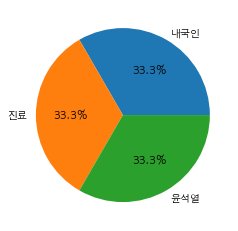

('1', '내국인', '2번')
('2', '진료', '2번')
('3', '윤석열', '2번')


In [2]:
#EXAM 

##크롤링  

import urllib.request 
from bs4 import BeautifulSoup 
url = 'https://news.daum.net/society#1'


res = urllib.request.urlopen(url)   # 응답 객체
res.geturl()                         # 접속 url주소를 반환
data =res.read()                     # 객체 데이터를 읽어 data변수 저장

# utd-8 디코딩
src = data.decode('utf-8')

# html 파싱
html = BeautifulSoup(src,'html.parser')
li_tags = html.select('.tit_g > a')

crawling_data = []
i=0
for li in li_tags:
    if li.string:
        # print(f"li tag내용[{i}]: ",li.string.strip())
        crawling_data.append(li.string.strip())
    i+=1

print(crawling_data)

#top 5 단어조사 리스트저장 및 출력 
import pickle 

with open('word_count.bin','wb') as f:
    pickle.dump(crawling_data,f)  


file= open("word_count.bin", mode='rb') 
news_data= pickle.load(file)



# 텍스트 전처리
import re
def clean_text(text_str):
    # 문장부호 제거
    text_str_re = re.sub(
        '[,.?!:\'\"]',
        '',
        text_str
        )  # sub(패턴, 변경단어, 변경할 자료)
    # 특수문자, 숫자 제거
    text_str_re = re.sub(
        '[!@#$%^&*()]|[0-9]',
        '',
        text_str_re)
    # 영문 소문자 -> 영문제거
    text_str_re = text_str_re.lower()
    text_str_re = re.sub('[a-z]','',text_str_re)
    # 공백 제거
    text_str_re = ' '.join(text_str_re.split())
    
    return text_str_re

## 텍스트 전처리 함수 호출
clean_texts = [clean_text(row) for row in news_data]
# print(">> text전처리 결과 <<")
# print(clean_texts)

## word count
word_count = {}

for text in clean_texts:        # 텍스트 -> 문장
    for word in text.split():    # 문장 -> 단어
        word_count[word] = word_count.get(word,0) + 1
# print(">> 워드 카운트 <<")
# print(word_count)

# 3회 이상 출력 단어 & 2~4자 단어 지정
new_word_count = {}
for word,cnt in word_count.items():
    if cnt >= 2 and len(word) >=2 and len(word) < 4:
        print(word,'--->',word_count[word])
        new_word_count[word] = new_word_count.get(word,cnt)
print(">> 단어 전처리 끝 결과 <<")
print(new_word_count)

## top word counter
from collections import Counter     # 모듈을 추가

counter = Counter(new_word_count)
top5_word = counter.most_common(5)  # Top 5
print(">> top 5 <<")
print(top5_word) #리스트 안에 튜플 키 벨류값 구조 

# 1. 단어와 출현 빈도수 만들기
words = []       # 단어
counts = []     # 출현 빈도수

for word,count in top5_word:
    words.append(word) 
    counts.append(count)
print(words)
print(counts)

## pyplot 모듈을 import => plt로 별칭 사용
import matplotlib.pyplot as plt


## 차트에서 한글 지원
from matplotlib import font_manager,rc


rc('font', family='AppleGothic')


## 원형그래프: pie()
print('원형 그래프')
plt.pie(counts,labels=words,autopct='%.1f%%')
plt.show()

##크롤링 결과를 sqlite에 저장  

import sqlite3

try: 
    conn = sqlite3.connect('word_count_db')  
    
    cursor= conn.cursor()
    sql= 'create table if not exists word_count(no text(50),name text(50), count text(50))' 
    cursor.execute(sql)
    
    cursor.execute("insert into word_count values ('1', '내국인','2번')") 
    cursor.execute("insert into word_count values ('2', '진료','2번')") 
    cursor.execute("insert into word_count values ('3', '윤석열','2번')") 
    
    conn.commit()  

    ## 레코드 조회
    cursor.execute("select * from word_count")
    rows = cursor.fetchall()    # 조회 레코드 읽기
    # # 출력1
    for row in rows:
        print(row)
        
except Exception as e:
    print("DB연동 에러 : ",e)
    conn.rollback()
finally:
    cursor.close()
    conn.close()
    